## SALARY PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('train_salary.csv')

In [3]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [5]:
##########################################
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [6]:
salary_cpy = df.copy()

In [7]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [8]:
salary_cpy.columns = salary_cpy.columns.str.strip()

In [9]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [10]:
salary_cpy = salary_cpy.drop('GrossPay',axis=1)

In [11]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00


In [12]:
salary_cpy = salary_cpy.dropna(subset=['HireDate'])

In [13]:
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [14]:
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : float(str(x)[1:]))

C:\Users\khush\AppData\Local\Temp\ipykernel_9156\3012604816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : float(str(x)[1:]))


In [15]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0


In [16]:
salary_cpy['month'] = salary_cpy['HireDate'].apply(lambda x : int(str(x[0:2])))
salary_cpy['day'] = salary_cpy['HireDate'].apply(lambda x : int(str(x[3:5])))
salary_cpy['year'] = salary_cpy['HireDate'].apply(lambda x : int(str(x[6:])))

C:\Users\khush\AppData\Local\Temp\ipykernel_9156\2935360147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_cpy['month'] = salary_cpy['HireDate'].apply(lambda x : int(str(x[0:2])))
C:\Users\khush\AppData\Local\Temp\ipykernel_9156\2935360147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_cpy['day'] = salary_cpy['HireDate'].apply(lambda x : int(str(x[3:5])))
C:\Users\khush\AppData\Local\Temp\ipykernel_9156\2935360147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [17]:
salary_cpy=salary_cpy.drop("HireDate",axis=1)

In [18]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,11310.0,6,10,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,53428.0,10,24,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,68300.0,9,25,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,62000.0,7,23,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,7,24,2013
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,11310.0,5,21,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,11310.0,5,21,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,12,17,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,44104.0,1,23,2013


####################################
1. job title
2. agency id
3. agency

In [19]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

In [20]:
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [21]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

<AxesSubplot:>

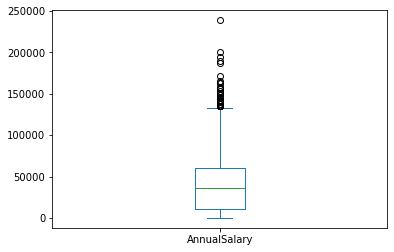

In [22]:
salary_cpy.AnnualSalary.plot.box()

In [23]:
salary_cpy[salary_cpy['AnnualSalary']>150000].shape

(16, 8)

In [24]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<150000]

In [25]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,11310.0,6,10,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,53428.0,10,24,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,68300.0,9,25,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,62000.0,7,23,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,7,24,2013
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,11310.0,5,21,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,11310.0,5,21,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,12,17,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,44104.0,1,23,2013


<AxesSubplot:>

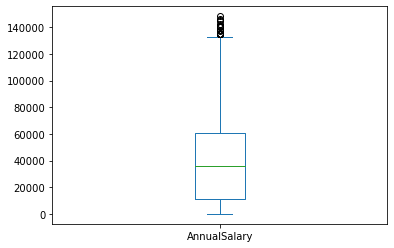

In [26]:
salary_cpy.AnnualSalary.plot.box()

In [27]:
salary_cpy[salary_cpy['AnnualSalary']>140000].shape

(9, 8)

In [28]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<140000]

<AxesSubplot:>

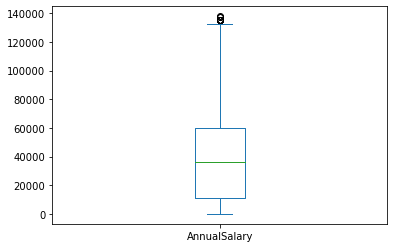

In [29]:
salary_cpy.AnnualSalary.plot.box()

C:\Users\khush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AnnualSalary', ylabel='Density'>

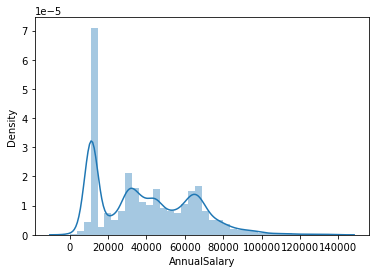

In [30]:
#### dustibution plot of annual salary
sns.distplot(salary_cpy.AnnualSalary)

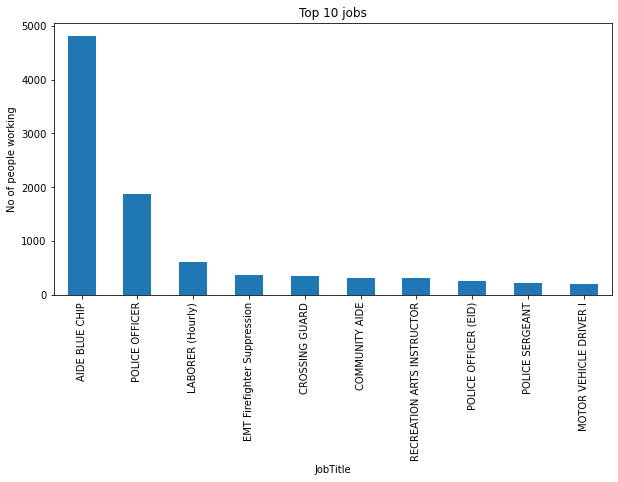

In [31]:
####### top 10 jobs for which hiring is there
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['JobTitle'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people working')
plt.title('Top 10 jobs')
plt.show()



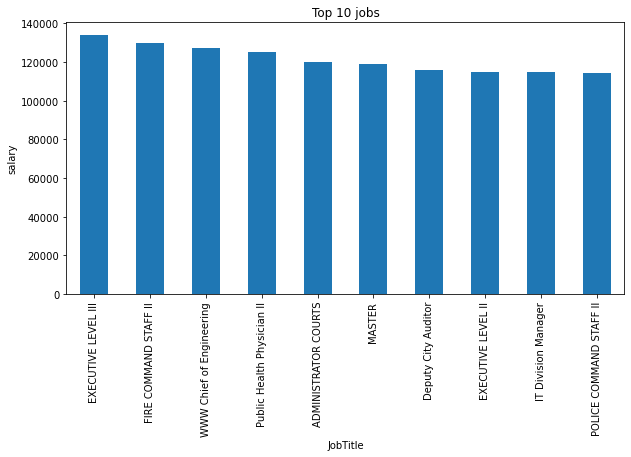

In [32]:
### top 10 jobs that fetch highest salary -  for this avg salary offered -each job
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('salary')
plt.title('Top 10 jobs')
plt.show()


In [33]:
###### top 10 agencies that have higher number of employee
###  top 10 agency ids
## analize salary distribution year wise
### which month most hirings are getting done


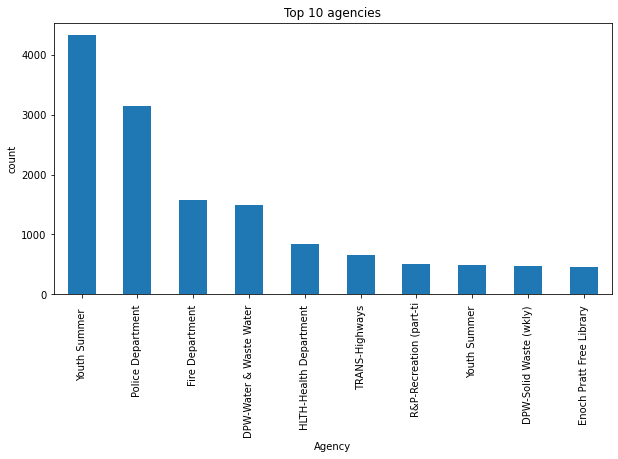

In [34]:
###
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('count')
plt.title('Top 10 agencies')
plt.show()


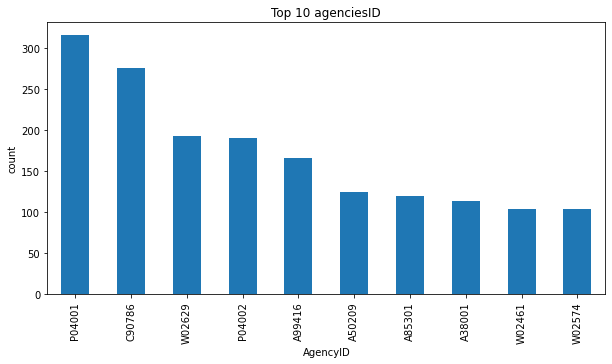

In [35]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('count')
plt.title('Top 10 agenciesID')
plt.show()

C:\Users\khush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='AnnualSalary'>

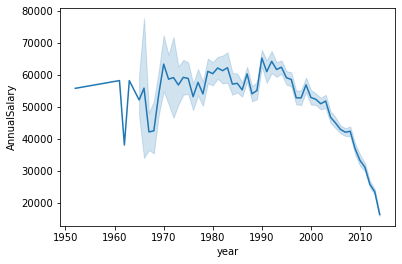

In [36]:
sns.lineplot(salary_cpy['year'],salary_cpy['AnnualSalary'])

<AxesSubplot:xlabel='month'>

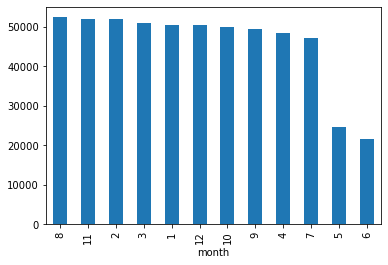

In [37]:
salary_cpy.groupby('month')['AnnualSalary'].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='month'>

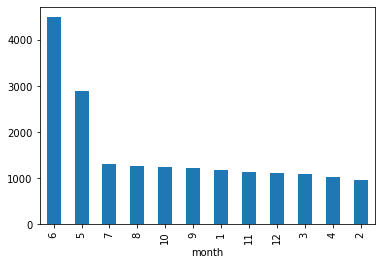

In [38]:
#### which month most number of people were hired
salary_cpy.groupby('month')['Name'].count().sort_values(ascending=False).plot.bar()

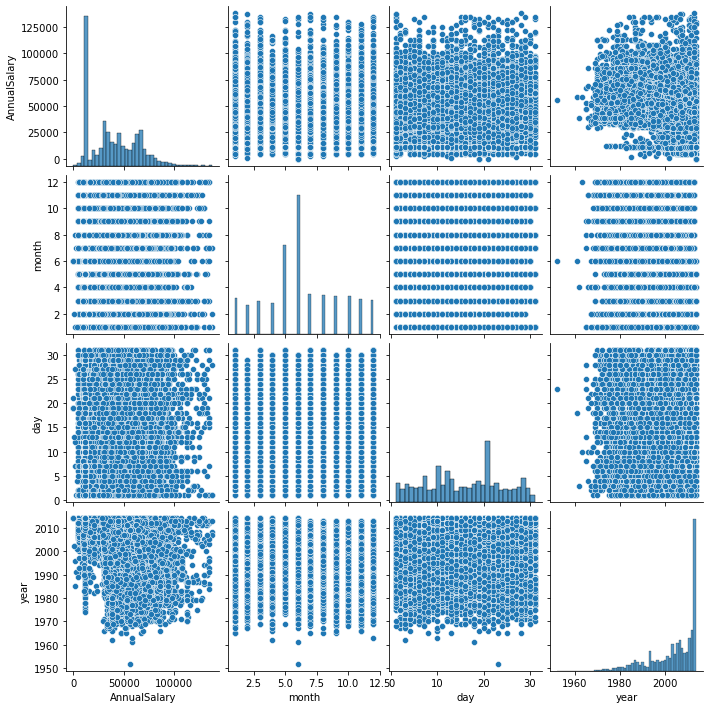

In [39]:
### multivariate analysis
sns.pairplot(salary_cpy)

<AxesSubplot:>

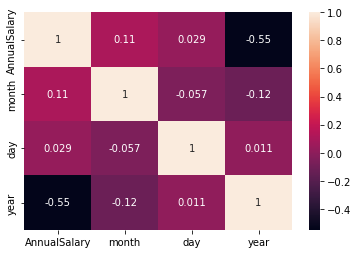

In [40]:
sns.heatmap(salary_cpy.corr(),annot=True)

In [41]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,11310.0,6,10,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,53428.0,10,24,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,68300.0,9,25,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,62000.0,7,23,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,7,24,2013
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,11310.0,5,21,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,11310.0,5,21,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,12,17,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,44104.0,1,23,2013


In [42]:
## categorical encoding - mean encoding

In [43]:
salary_cpy.shape

(18885, 8)

In [44]:
mean_job = salary_cpy.groupby('JobTitle')['AnnualSalary'].mean()
mean_job

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1067, dtype: float64

In [45]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].map(mean_job)

C:\Users\khush\AppData\Local\Temp\ipykernel_9156\2907516346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_cpy['JobTitle']=salary_cpy['JobTitle'].map(mean_job)


In [46]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,"Aaron,Keontae E",11313.967200,W02200,Youth Summer,11310.0,6,10,2013
1,"Aaron,Patricia G",47443.500000,A03031,OED-Employment Dev,53428.0,10,24,1979
2,"Aaron,Petra L",69750.666667,A29005,States Attorneys Office,68300.0,9,25,2006
3,"Abaineh,Yohannes T",57940.000000,A65026,HLTH-Health Department,62000.0,7,23,2009
4,"Abbene,Anthony M",44531.160494,A99416,Police Department,43999.0,7,24,2013
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,W02235,Youth Summer,11310.0,5,21,2014
18977,"Zotamou,Pivot D",11313.967200,W02629,Youth Summer,11310.0,5,21,2014
18978,"Zovistoski,Zachary D",44531.160494,A99416,Police Department,43999.0,12,17,2013
18979,"Zubyk,Stanislav T",60588.139335,A99262,Police Department,44104.0,1,23,2013


In [47]:
salary_cpy = salary_cpy.drop(['Name'], axis=1)

In [48]:
mean_agency = salary_cpy.groupby('Agency')['AnnualSalary'].mean()
mean_agency

Agency
COMP-Audits               65004.615385
COMP-Communication Ser    37876.966667
COMP-Comptroller's O      67637.625000
COMP-Real Estate          64279.875000
Circuit Court             56210.485214
                              ...     
TRANS-Towing              33920.215385
TRANS-Traffic             34172.489691
Youth Summer              11346.315789
Youth Summer              11310.270645
Youth Temp Adult          24202.971014
Name: AnnualSalary, Length: 65, dtype: float64

In [49]:
salary_cpy['Agency']=salary_cpy['Agency'].map(mean_agency)

In [50]:
salary_cpy

,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,11313.967200,W02200,11310.270645,11310.0,6,10,2013
1,47443.500000,A03031,51495.424242,53428.0,10,24,1979
2,69750.666667,A29005,64874.560224,68300.0,9,25,2006
3,57940.000000,A65026,39980.900360,62000.0,7,23,2009
4,44531.160494,A99416,61481.005417,43999.0,7,24,2013
...,...,...,...,...,...,...,...
18976,11313.967200,W02235,11310.270645,11310.0,5,21,2014
18977,11313.967200,W02629,11346.315789,11310.0,5,21,2014
18978,44531.160494,A99416,61481.005417,43999.0,12,17,2013
18979,60588.139335,A99262,61481.005417,44104.0,1,23,2013


In [51]:
mean_agencyid = salary_cpy.groupby('AgencyID')['AnnualSalary'].mean()
mean_agencyid

AgencyID
A01001    58253.577662
A01020    80547.000000
A01030    77855.222222
A02001    66376.466667
A02002    42858.372549
              ...     
W02698    11310.000000
W02699    11310.000000
W07900    24515.227273
W07901    21840.000000
W07905    15080.000000
Name: AnnualSalary, Length: 1176, dtype: float64

In [52]:
salary_cpy['AgencyID']=salary_cpy['AgencyID'].map(mean_agencyid)

In [53]:
salary_cpy

,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,11313.967200,11310.000000,11310.270645,11310.0,6,10,2013
1,47443.500000,46667.000000,51495.424242,53428.0,10,24,1979
2,69750.666667,65926.133333,64874.560224,68300.0,9,25,2006
3,57940.000000,48071.851064,39980.900360,62000.0,7,23,2009
4,44531.160494,44012.307229,61481.005417,43999.0,7,24,2013
...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11310.270645,11310.0,5,21,2014
18977,11313.967200,11310.000000,11346.315789,11310.0,5,21,2014
18978,44531.160494,44012.307229,61481.005417,43999.0,12,17,2013
18979,60588.139335,60203.340426,61481.005417,44104.0,1,23,2013


In [54]:
###### training, testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
train,test = train_test_split(salary_cpy,test_size=0.2,random_state=40)

In [58]:
y_train = train.pop('AnnualSalary')
x_train = train

In [61]:
y_test = test.pop('AnnualSalary')
x_test = test

In [62]:
x_train

,JobTitle,AgencyID,Agency,month,day,year
7642,43420.383333,58304.555556,70879.869663,10,29,1973
4899,37750.307692,57531.300000,42565.513078,2,11,2008
6525,11313.967200,11310.000000,11310.270645,6,19,2013
10668,21570.423841,53425.912281,44092.921659,6,4,2014
8828,28019.000000,57318.900000,61481.005417,1,23,2014
...,...,...,...,...,...,...
11615,61887.457627,54165.304348,44092.921659,2,13,2012
16156,41202.000000,44320.250000,39950.622030,6,9,2014
14589,11313.967200,11310.000000,11310.270645,6,12,2012
14643,60588.139335,57363.487805,61481.005417,9,26,2011


In [63]:
y_train

7642     67288.0
4899     36887.0
6525     11310.0
10668    29494.0
8828     27808.0
          ...   
11615    49668.0
16156    41202.0
14589    11310.0
14643    44773.0
11673    82704.0
Name: AnnualSalary, Length: 15108, dtype: float64

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns] )

In [66]:
x_train

,JobTitle,AgencyID,Agency,month,day,year
7642,0.165190,0.850517,1.502119,1.234739,1.571928,-2.995648
4899,-0.068712,0.815681,0.151586,-1.483279,-0.571617,0.375314
6525,-1.159263,-1.266644,-1.339221,-0.124270,0.381070,0.856880
10668,-0.736164,0.630729,0.224440,-0.124270,-1.405217,0.953194
8828,-0.470147,0.806112,1.053814,-1.823031,0.857413,0.953194
...,...,...,...,...,...,...
11615,0.926993,0.664039,0.224440,-1.483279,-0.333445,0.760567
16156,0.073677,0.220508,0.026861,-0.124270,-0.809788,0.953194
14589,-1.159263,-1.266644,-1.339221,-0.124270,-0.452531,0.760567
14643,0.873394,0.808121,1.053814,0.894987,1.214670,0.664254


In [67]:
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns] )

In [68]:
lr = LinearRegression()

In [69]:
reg = lr.fit(x_train,y_train)

In [70]:
y_pred = reg.predict(x_test)

In [71]:
y_test

8116     30014.0
12921    11310.0
4004     60004.0
10824    44190.0
9512     71600.0
          ...   
16417    96500.0
8485     55100.0
3085     82592.0
11816    37339.0
18493    78897.0
Name: AnnualSalary, Length: 3777, dtype: float64

In [72]:
y_pred

array([29234.16338847, 10605.9975065 , 59117.5420147 , ...,
       82249.90330949, 39601.20928108, 76473.11188939])

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9639076918145556